In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
od.version()

'0.1.22'

In [4]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [6]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jackflahive
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 74.4MB/s]

In [7]:
import os

In [8]:
data_dir = './weather-dataset-rattle-package'

In [9]:
os.listdir(data_dir)

['weatherAUS.csv']

In [10]:
train_csv = data_dir + '/weatherAUS.csv'

In [11]:
!pip install pandas --quiet

In [12]:
import pandas as pd


In [13]:
raw_df = pd.read_csv(train_csv)

In [14]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [16]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [17]:
####Exploratory Data Analysis and Visualization

In [18]:
!pip install plotly matplotlib seaborn --quiet

In [19]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [20]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [21]:
px.histogram(raw_df,
             x='Temp3pm',
             title='Temperature at 3 pm vs. Rain Tomorrow',
             color='RainTomorrow')

In [22]:
px.histogram(raw_df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today'
             )

In [23]:
px.scatter(raw_df.sample(2000),
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday'
)

In [24]:
##sometimes if it is a massive dataset you may want to work with a sample first, we are not but this is how you would do it

In [25]:
use_sample = False

In [26]:
sample_fraction = 0.1

In [27]:
if use_sample:
  raw_df = raw_df.sample(frac=sample_fraction).copy()

In [28]:
####Training, Validation and Tests Sets

In [29]:
#Training set - used to train the model ie compute loss and adjudt the models weights using an optimization technique
#validation set - used to evaluate the model during training, tune model hyperameters, and pick best version of the model
#Test set - used to compare different models or approaches and report the models final accuracy.
#as a general rule, 60% training, 20% validation and 20% test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [32]:
print('train_df.shape :', train_df.shape)
print('val_df.shape : ', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape :  (28158, 23)
test_df.shape : (28158, 23)


In [33]:
#when working with dates, its often better to seperate the training, validation and test sets with time, so that the model is trained on data from the past
#and evaluated on data from the future
#for the current dataset, we can use the date column in the dataset to create another column for year. We will pick at least two years for the test set
#and one year for the validation set

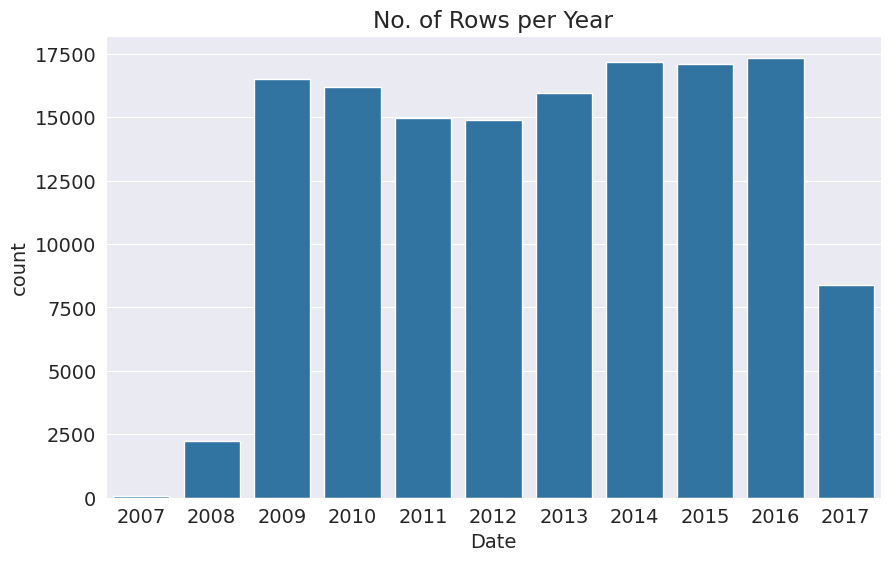

In [34]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [35]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [36]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape:  (25710, 23)


In [37]:
###Identifying Input and Target Columns

In [38]:
##skipping the first and last column Date and the target

In [39]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [40]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [41]:
target_col

'RainTomorrow'

In [42]:
#we can now create inputs and targets for the training, validation and tests sets for further processing and model training

In [43]:
train_inputs = train_df[input_cols].copy()
train_targets =train_df[target_col].copy()

In [44]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [45]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [46]:
##identify which are numerical and which ones are catagorical

In [47]:
!pip install numpy --quiet

In [48]:
import numpy as np


In [49]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [50]:
##lets view some statistics from the numeric columns

In [51]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000


In [52]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am']

In [53]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [54]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [55]:
#Imputing Missing Numeric Data
#ML models cant work missing numeric data
#The process of filling missing values is called imputation

In [56]:
#There are several techniques for imputation, but we'll use the most basic one: replacing missing
#values with the average value in the column using the SimpleImputer class from Sklearn.impute

In [57]:
from sklearn.impute import SimpleImputer

In [58]:
imputer = SimpleImputer(strategy = 'mean')

In [59]:
#check the number of missing values in each numeric column

In [60]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
dtype: int64

In [61]:
#The first step in inputation is to fit the imputer to the data ie. compute the chosen satistic(eg mean) for each column in the dataset

In [62]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [63]:
#after calling fit, the computed statistic for each column is stored in the statistics_ property of the imputer

In [64]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991]

In [65]:
#The missing values in the training, test, and validation sets can now be filled in using the transform method of the imputer

In [66]:
imputer.transform(train_inputs[numeric_cols])

array([[13.4       , 22.9       ,  0.6       , ...,  8.        ,
         4.49925023, 16.9       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.43116082,
         4.49925023, 17.2       ],
       [12.9       , 25.7       ,  0.        , ...,  4.43116082,
         2.        , 21.        ],
       ...,
       [17.3       , 37.8       ,  0.        , ...,  4.43116082,
         4.49925023, 29.7       ],
       [20.1       , 38.5       ,  0.        , ...,  4.43116082,
         4.49925023, 29.8       ],
       [22.5       , 39.6       ,  0.        , ...,  4.43116082,
         4.49925023, 30.1       ]])

In [67]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [68]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

In [69]:
#Scaling Numeric Features

In [70]:
#Another good practice is to scale numeric features to a small range of values eg (0,1) or (-1,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the models loss.
#Optimization algorithms also work better in practice with smaller numbers
#The numeric columns in our dataset have varying ranges

In [ ]:
raw_df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000


In [71]:
#lets use the MinMaxScaler from sklearn.preprocessing to scale the values to the (0,1) range

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
?MinMaxScaler

In [74]:
scaler = MinMaxScaler()

In [75]:
#first we fit the scaler to the data ie compute the range of values for each column

In [76]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [77]:
#we can now inspect the minimum and maximum values in each colum

In [78]:
print('Minimum: ')
list(scaler.data_min_)

Minimum: 


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2]

In [79]:
print('Maximum: ')
list(scaler.data_max_)

Maximum: 


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2]

In [80]:
#we can now seperately scale the training, validation and test sets using the transform method of scaler

In [81]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [82]:
#we can now verify that values in each column lie in the range (0,1)

In [83]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
#Encoding Catagorical data
#machine learning models can only be trained with numeric data, we need to convert categorical data, so we need to convert categorical data to numbers.
#A common technique is to use one-hot encoding for categorical columns

In [85]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [88]:
#we fit the encoder to the data ie identify the full list of categories across all categories across all categorical columns.

In [89]:
encoder.fit(raw_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [90]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [91]:
#we can generate column names for each individual category using get_feature_names

In [92]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [93]:
#to perform the encoding we use the transform method of encoder

In [94]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-94-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-94-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-94-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-94-8950d7c1751d>:1: PerformanceWarning:

Da

In [95]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037741,0.526244,ENE,0.372093,NaN,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037741,0.526244,SSE,0.341085,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037741,0.526244,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037741,0.526244,SSE,0.255814,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.566038,0.523629,0.018329,0.037741,0.526244,ENE,0.193798,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037741,0.526244,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.037741,0.526244,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037741,0.526244,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.037741,0.526244,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [96]:
#saving processed data to disk
#it can be usefull to save processed data to disk, especially for large datasets, to avoid repeating the preprossing steps every time you start the jupyter notebook
#The parquet format is a fast and efficient format for saving and loading Pandas dataframes

In [97]:
print('train_inputs: ', train_inputs.shape)
print('train_targets: ', train_targets.shape)
print('val_inputs: ', val_inputs.shape)
print('val_targets: ', val_targets.shape)
print('test_inputs: ', test_inputs.shape)
print('test_targets: ', test_targets.shape)

train_inputs:  (97988, 123)
train_targets:  (97988,)
val_inputs:  (17089, 123)
val_targets:  (17089,)
test_inputs:  (25710, 123)
test_targets:  (25710,)


In [98]:
!pip install pyarrow --quiet

In [99]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [100]:

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

In [101]:
#we can now read the data back using pd.read_parquet
#under the steps below

In [102]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 604 ms, sys: 1.39 s, total: 1.99 s
Wall time: 5.01 s


In [103]:
#lets verify the data was loaded properly

In [104]:
print('train_inputs: ', train_inputs.shape)
print('train_targets: ', train_targets.shape)
print('val_inputs: ', val_inputs.shape)
print('val_targets: ', val_targets.shape)
print('test_inputs: ', test_inputs.shape)
print('test_targets: ', test_targets.shape)

train_inputs:  (97988, 123)
train_targets:  (97988,)
val_inputs:  (17089, 123)
val_targets:  (17089,)
test_inputs:  (25710, 123)
test_targets:  (25710,)


In [105]:
###training a Logistic Regression Model
#Logistic Regression is a technique for solving binary classification problems
#we take linear combination(or weighted sum of the input features)
#we apply the sigmoid function to the result to obtain a number of between 0 and 1
#this number represents the probability of the input being classified as 'Yes'
#instead of RMSE, the cross entropy loss function is used to evaluate the results



In [106]:
from sklearn.linear_model import LogisticRegression

In [ ]:
?LogisticRegression

In [107]:
model = LogisticRegression(solver='liblinear')

In [108]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets )

LogisticRegression(solver='liblinear')

In [109]:
#1. we initialise a model with random parameters(weights & biases)
#2. we pass some inputs into the model to obtain predictions
#3. we compare the models predictions with the actual targets using the loss function
#4. we use an optimisation technique(like least sqaures, gradient descent ect) to reduce the loss by adjusting the weights & biases of the model
#5. We repeat steps 1 to 4 till the predictions from the model are good enough

In [110]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums'

In [111]:
#lets check the weights and biases of the model

In [112]:
print(model.coef_.tolist())

[[0.9829427139776121, -1.613660274202963, 3.2569773371317976, 0.7391112141072579, -1.6657303458153991, 6.71278521205857, -0.8945748396434513, -1.4786894319225272, 0.5085654020155529, 5.6689864936519285, 5.7512584367653865, -9.442215445824365, -0.15422784930937783, 1.269256634956324, 0.960904981823725, 0.5968084862508178, -0.5433614205062558, 0.48409311387287457, 0.012641460794294354, 0.3420933563746323, -0.35029158323497206, 0.18144774505951808, 0.42586359091388104, -0.0049010681131742674, 0.015434396136745188, 0.2538052218063922, -0.018371477830196242, -0.030485294028295765, -0.4672918031756069, -0.14419881437840681, -0.5908201773296934, -0.7446422558999733, -0.24989303636145174, -0.3286889192723589, -0.5709404687008219, 0.08019354549073676, 0.01403926146561595, 0.0599526367513897, -0.8771214721243351, -0.44146351281363416, 0.011838795481602766, -0.45949219143740877, -0.4601867457694045, -0.07469556879438734, 0.19459671755219188, 0.44567911050944725, 0.6073741967288642, 0.430398879642

In [113]:
print(model.intercept_)

[-2.36393755]


In [114]:
n = len(model.coef_.tolist())

weight_df =pd.DataFrame({
    'feature': (numeric_cols + encoded_cols),
    'weight': model.coef_.tolist()[0]
})

<Axes: xlabel='weight', ylabel='feature'>

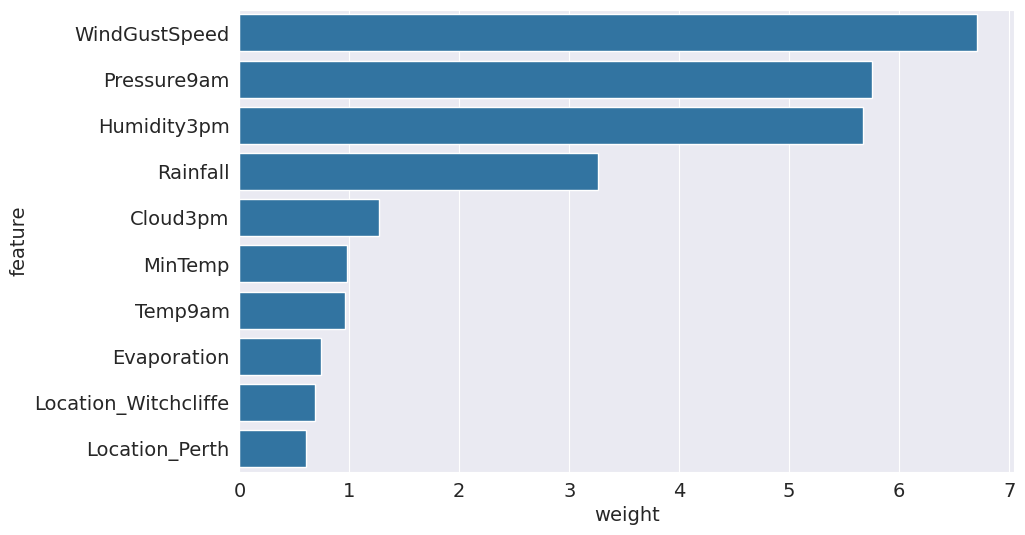

In [115]:

sns.barplot(data=weight_df.sort_values('weight', ascending=False).head(10), x='weight', y='feature')

In [116]:
#Make predictions and evaluate the model

In [117]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [118]:
train_preds = model.predict(X_train)

In [119]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [120]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [121]:
#Computing the accuracy
#we can test the accuracy of the models predictions by computing the percentage of matching values i train_preds and train_targets
#This can be done using the accuracy_score function from sklearn.metrics

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy_score(train_targets, train_preds)

0.8519002326815528

In [124]:
#for logistical regression we can output probabilities using predict_proba

In [125]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93950706, 0.06049294],
       [0.94333135, 0.05666865],
       [0.95980411, 0.04019589],
       ...,
       [0.98729966, 0.01270034],
       [0.98357986, 0.01642014],
       [0.87598699, 0.12401301]])

In [126]:
#the right side is the probability of the class no and the left side is the probability of the class yes
model.classes_

array(['No', 'Yes'], dtype=object)

In [127]:
#The model achieves an 85.1% accuracy on the training set
#We can visualise the breakdown of correctly and incorrectly classified inputs using a confusion matrix

In [128]:
from sklearn.metrics import confusion_matrix

In [129]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94613466, 0.05386534],
       [0.477475  , 0.522525  ]])

In [ ]:
#this says that among the cases where it was not raining it predicted no 94% of the time and yes 5% of the time.
#among cases where it actually rained, it predicted no 47% of time, and predicted yes 52% of the time
#so there was a 47% false no rain prediction

In [130]:
def predict_and_plot(inputs, targets, name=''):
  preds = model.predict(inputs)

  accuracy = accuracy_score(targets, preds)
  print("Accuracy: {:.2f}%".format(accuracy * 100))

  cf = confusion_matrix(targets, preds, normalize='true')
  plt.figure()
  sns.heatmap(cf, annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name));

  return train_preds

Accuracy: 85.19%


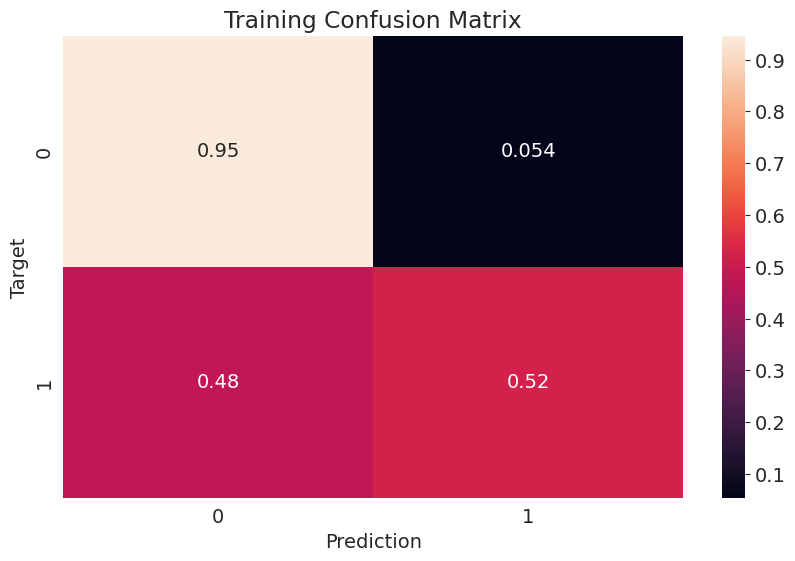

In [131]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

In [132]:
#Lets compute the models accuracy on the validation and tests sets too

Accuracy: 85.41%


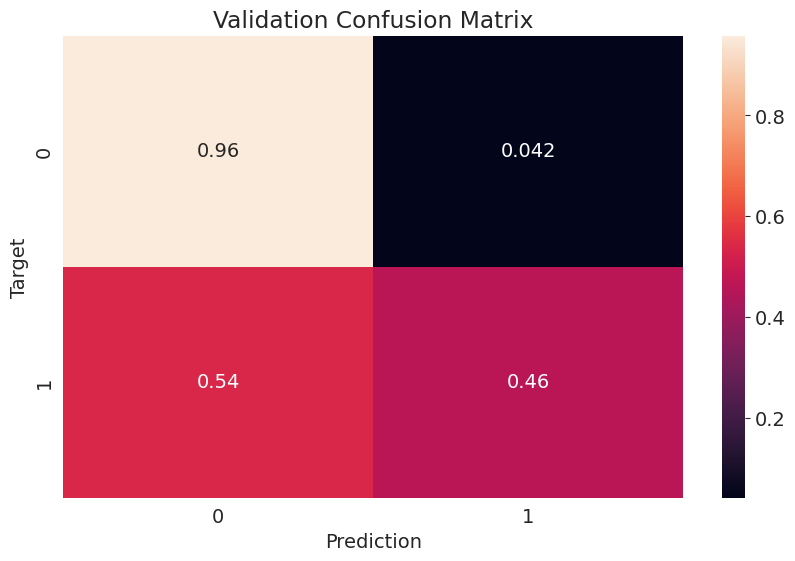

In [133]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 84.25%


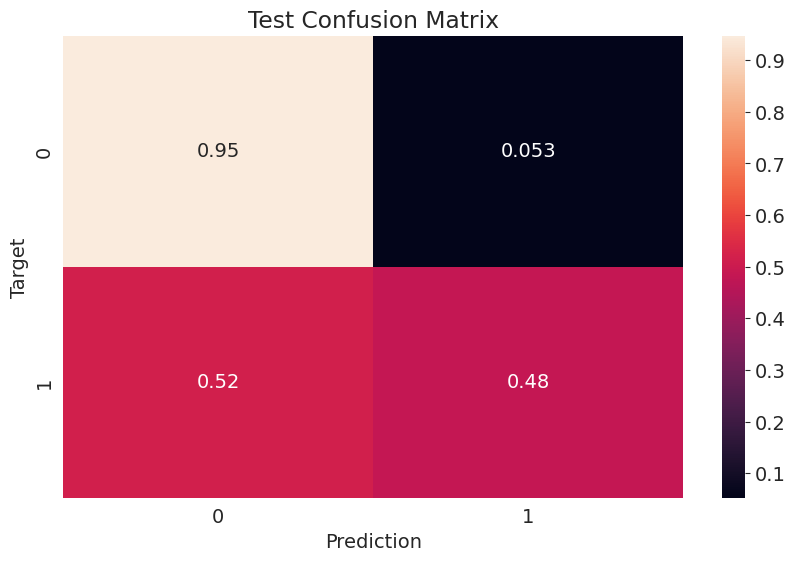

In [134]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [135]:
#The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalises well to data it hasnt seen before.
#########
#But how good is 84% accuracy? It depends on the nature of the problem and on business requirements
#########
#A good way to verify whether the model has actually learned something usefull is to compare its results to a "random" or "dumb" model.

#lets create two models: one which guesses randomly and another that always returns 'No'. Both of these models completely ignore the inputs given to them.

In [136]:
def random_guess(inputs):
  return np.random.choice(["No", "Yes"], len(inputs))

In [137]:
def all_no(inputs):
  return np.full(len(inputs), "No")

In [138]:
#lets check the accuracies on these two models on the test set

In [139]:
random_guess(X_val)

array(['No', 'No', 'No', ..., 'Yes', 'No', 'Yes'], dtype='<U3')

In [140]:
all_no(X_val)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [141]:
accuracy_score(test_targets, random_guess(X_test))

0.4998444185141968

In [142]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

In [143]:
#Making predictions on a single input

In [144]:
#Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary
#collected from the Katherine weather depaqrtment today

In [145]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [147]:
new_input_df = pd.DataFrame([new_input])

In [148]:
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,...,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes


In [150]:
#Now we will apply the same processing transformations
#Imputing missing values using the imputer created earlier
#scaling numerical features using the scaler created earlier
#ENCODING categorical features using the encoder created earlier

In [151]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])


<ipython-input-151-1e64a48fb6dc>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-151-1e64a48fb6dc>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-151-1e64a48fb6dc>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-151-1e64a48fb6dc>:3: PerformanceWarning:

In [154]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.747642,0.718336,0.027493,0.028966,0.526244,0.356589,0.1,0.229885,0.89,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [152]:
#we can now make a prediction using model.predict

In [160]:
prediction = model.predict(X_new_input)[0]

In [161]:
prediction

'Yes'

In [157]:
#our model predicts that it will rain tomorrow in katherine. We can check the probability of this prediction

In [162]:
prob = model.predict_proba(X_new_input)

In [163]:
prob

array([[0.48885525, 0.51114475]])

In [164]:
#lets define a helper function to make predictions for individual inputs

In [168]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [169]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [170]:
predict_input(new_input)

<ipython-input-168-bc00b974dee8>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-168-bc00b974dee8>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-168-bc00b974dee8>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-168-bc00b974dee8>:5: PerformanceWarning:

('Yes', 0.6316578504898855)

In [171]:
################################################
#Saving and loading trained models

In [172]:
#anything required for the model should be saved

In [173]:
import joblib

In [174]:
#Let's first create a dictionary containing all the required objects.

In [175]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [176]:
#we can now save to file using joblib.dump

In [177]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [178]:
#the object can now be loaded back using joblib.load

In [179]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [180]:
#lets use the loaded model to make predictions on the original test set

In [181]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8424737456242707